# Интерполација

**Садржај:**
1. [Појам интерполације](#Појам-интерполације)
1. [Линеарни модели](#Линеарни-модели)
1. [Интерполациони полином у стандардном облику](#Интерполациони-полином-у-стандардном-облику)
1. [Лагранжова интерполација](#Лагранжова-интерполација)
1. [Невилов алгоритам](#Невилов-алгоритам)
1. [Чебишевљеви чворови](#Чебишевљеви-чворови)

In [1]:
import numpy as np
import matplotlib as mplb
import matplotlib.pyplot as plt

## Појам интерполације

**Апроксимација функција** (function approximation) означава процес којим се на основу неког скупа података (data set)
$$S=\big\{(x_k,f_k)\ \mid\ k=0,1,2,\dots,n\big\}$$ 
функција $f$  замењује неком другом функцијом $g.$ Поступак се спроводи тако да $g$ личи на полазну функцију $f.$ Критеријум сличности (similarity measure) зависи од конкретног проблема који се решава. Сврха замене јесте да функција $g$ буде једноставнија за рад приликом решавања конкретног проблема. Скуп података $S$ у члановима $f_k$ може да садржи вредности саме функције $f$ или њених извода у тачкама $x_k.$ Скуп података $S$ зовемо *узорковање* функције $f,$ (sampling) а апсцисе $x_k$ зовемо **чворови** узорковања (nodes). Бавићемо се случајем када су $f_k=f(x_k).$

Термин **интерполација** (interpolation) користимо у двема ситуацијама. У наставку их упознајемо.

Означимо са $I_S$ најмањи сегмент реалне праве који садржи све чворове $x_k$ скупа података $S,$
$$I_S=\big[\min\{x_k\}\ ,\ \max\{x_k\}\,\big].$$
Израчунавање вредности апроксимационе функције $g$ унутар интервала $I_S,$ у сврхе апроксимације вредности функције $f,$ називамо **интерполација** функције $f.$ Израчунавање вредности функције $g$ изван интервала $I_S$ представља процес **екстраполације** вредности функције $f,$ (extrapolation) видети слику у наставку. Познато је да је екстраполација поступак мање тачности у односу на интерполацију.

<div>
   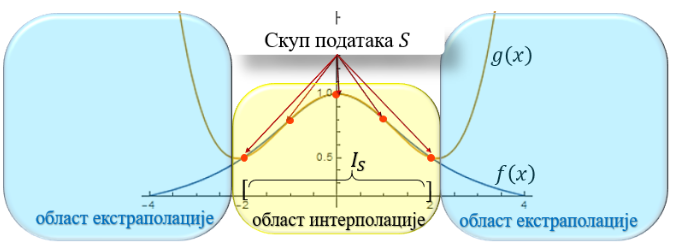  
</div>

Уколико се користе вредности ивода функције $g$ у сврхе апроксимације извода функције $f,$ овакав процес представља **нумеричко диференцирање** (numerical differentiation). Ако се $g$ користи за апроксимацију одређеног интеграла функције $f,$ процес је **нумеричка интеграција** (numerical integration).

Тип функције $g$ (њен експлицитни облик) одређује тип модела апроксимације функције $f.$ Тако говоримо о алгебарском моделу када је $g$ алгебарски полином, о експоненцијалном моделу када је $g$ у основи експоненцијална функција, о тригонометријском моделу, итд. Наравно, функција $g$ може да представља и комбинацију различитих типова елементарних функција. Тип модела апроксимације прилагођава се геометрији података скупа $S.$ Модел својим графиком треба да што веродостојније опонаша особине скупа $S$ - монотоност, конвексност, $\dots$

Други процес за који се такође користи термин интерполација јесте везан за критеријум блискости функција $f$ и $g.$ Заправо, избор критеријума блискости између функција $f$ и апроксимационе функције $g$ дефинише тип апроксимације. Апроксимација функција која као критеријум сличности користи услов да се функције $f$ и $g$ поклапају на скупу података $S$ назива се [**интерполација**](https://en.wikipedia.org/wiki/Polynomial_interpolation). Када се користе другачији критеријуми блискости (сличности), говоримо и даље о **апроксимацији**, само се додатно нагласи критеријум сличности. Тако нпр. ако је критеријум сличности минимално одступање у Еуклидовој норми израза 
$$ \|f_S-g_S\|_2,\qquad f_S=\begin{bmatrix}f_0&f_1&\dots&f_n\end{bmatrix}^T,\ g_S=\begin{bmatrix}g_0&g_1&\dots&g_n\end{bmatrix}^T,$$
онда говоримо о средње квадратној апроксимацији, или апроксимацији најмањих квадрата (least squares).

У наставку се бавимо интерполацијом у смислу критеријума блискости две функције.

**Пример 1.** На слици је приказана разлика између интерполације и апроксимације, као и остали елементи апроксимације функција: чворови и узорци.

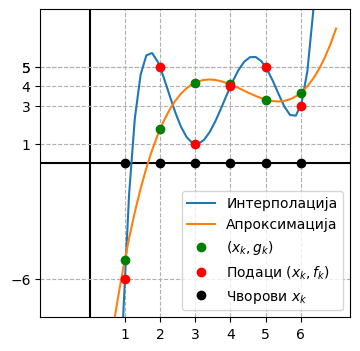

In [2]:
S=np.array([[1.,-6],[2,5.],[3,1],[4,4],[5,5],[6,3]])
P5=np.polyfit(S[:,0],S[:,1],5)
P3=np.polyfit(S[:,0],S[:,1],3)
t=np.linspace(-1,7)
y5=np.polyval(P5,t)
y3=np.polyval(P3,t)

slk=plt.figure(figsize=(4,4))
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.plot(t,y5,label='Интерполација')
plt.plot(t,y3,label='Апроксимација')
plt.plot(S[:,0],np.polyval(P3,S[:,0]),'go',label='$(x_k,g_k)$')
plt.plot(S[:,0],S[:,1],'ro',label='Подаци $(x_k,f_k)$')
plt.plot(S[:,0],np.zeros((6,)),'ko',label='Чворови $x_k$')
plt.ylim([-8,8])
plt.xticks(S[:,0])
plt.yticks(S[:,1])
plt.grid(linestyle='--')
plt.legend();

***

Посматраћемо случај најчешћег типа скупа података. Претпоставићемо да скуп $S=\big\{(x_k,f_k)\ \mid\ k=0,1,2,\dots,n\big\}$ садржи информације о вредности функције $f$ у различитим чворовима, не и о њеним изводима,
$$
S=\big\{\big(x_k,f(x_k)\big)\ |\ k=0,1,\dots,n,\ x_i\neq x_j,\ i\neq j\big\}.
$$
За узорковање $S$  функције $f$ формира се интерполациона функција изабараног типа модела у којој фигуршу непознати параметри $\lambda_i,$
$$g(x)=g(x;\lambda_0,\lambda_1,\dots,\lambda_m).$$
Дакле, избор типа модела $g$ диктира неку глобалну геометрију овог интерполанта, док параметри $\lambda_i$ служе да се та геометрија наштимује за пролазак функције $g$ кроз податке скупа $S.$ Вредности параметара  функције $g$ резултат су **интерполационих услова:**
$$
f(x_k)=g(x_k),\quad k=0,1,\dots,n.
$$
Интерполациони услови служе да се кроз систем једначина одреде непознате вредности параметара $\lambda_i.$ Пожељно је да решавање система интерполационих услова буде што лакше, као и да решење по $\lambda_i$ буде јединствено.

**Пример 2.** Експоненцијална функција има јединствену особину коју препознајемо кроз њен таблични извод:
$$(e^x)'=e^x.$$
Брзина раста вредности експоненцијалне функције пропорционална је вредности саме функције.
У многим природним феноменима праћене карактеристике расту или опадају брзином која је пропорционална њиховој величини. На пример, уколико је $y=f(t)$ број живих јединки у некој популацији у датом временском тренутку $t,$ брзина промене броја јединки популација $f'(t)=\displaystyle\lim_{\Delta t\to0}\dfrac{f(t+\Delta t)-f(t)}{\Delta t}$ пропорционална је величини те популације $f(t).$ То записујемо једнакошћу 
$$f'(t)=\lambda f(t)$$ за неку константу $\lambda.$ 
Математички модел задат овом једначином се показао доста добро у пракси за предвиђање бројности популације. Постоје и бољи модели, могу се наћи нпр. на [Википедији](https://en.wikipedia.org/wiki/Logistic_function). 

Једначина $f'(t)=\lambda f(t)$ за $\lambda>0$ зове се једначина природног раста. Када је $\lambda<0$ говоримо о једначини природног опадања. Размотрићемо значај константе пропорционалности $\lambda$ модела раста популације. 

Имајући у виду да се једначина модела популације може да напише у облику
$$\lambda=\dfrac{f'(t)}{f(t)}\,,$$
видимо да коефицијент $\lambda$ одговара релативном тренутном расту популације, као и да он представља константу.
Из теорије диференцијалних једначина познато је да је једино решење ове диференцијалне једначина експоненцијална функција $f(t)=f(0)e^{\lambda t}.$ Због тога кажемо да популација са константним релативним растом мора да има експоненцијални раст. Фактор релативног раста $\lambda$ је коефицијент уз променљиву $t$ експоненцијалне фунцкије $f(0)e^{\lambda t}$. На пример, за вредност $\lambda=0.02$ и време $t$ мерено у годинама кажемо да популација расте брзином од $2\%$ годишње. 

Одређивање параметара експоненцијалног модела $$g(t)=c\cdot e^{\lambda t},$$ подразумева одређивање вредности константи $c$ и $\lambda$ на основу неког скупа података о функцији популације $f(t).$  Посматраћемо људску популацију, извор података [worldometer](https://www.worldometers.info/world-population/world-population-by-year/). Уколико за почетак мерења узмемо годину $2000.$ са приближно $6.149\cdot 10^9,$ овај податак користимо као први интерполациони услов $f(0)=g(0)=c\cdot e^{0\cdot\lambda }=c.$ Тиме је одређена вредност првог параметра интерполационог модела $c.$ За годину $2020.$ процена бројности светског становништва је $f(20)=7.841\cdot 10^9.$ То постаје други интерполациони услов $g(20)=f(20)=7.841\cdot 10^9,$ на основу кога одређујемо и параметар $\lambda.$ 
\begin{align}
       & 7.841\cdot 10^9=g(20)=c\cdot e^{20\lambda }=6.149\cdot 10^9e^{20\lambda }\\
       &\Longrightarrow\quad e^{20\lambda }=\dfrac{7.841\cdot 10^9}{6.149\cdot 10^9}\approx1.275\\
       &\Longrightarrow\quad \lambda \approx\dfrac{\ln1.275}{20}\approx0.012.
\end{align}

In [3]:
7.841/6.149

1.275166693771345

In [4]:
np.log(1.275)/20

0.01214730893051947

Добили смо интерполацион модел експоненцијалног типа $g(t)=c\cdot e^{\lambda t}=6.149\cdot 10^9e^{0.012t}.$ Помоћу њега можемо да потражимо предвиђања бројности популације за године $2010.$ и $2022.$

In [5]:
y=np.array([10,22])
6.149*10**9*np.exp(0.012*y)

array([6.93297814e+09, 8.00678628e+09])

$$g(10)=6.933\cdot10^9,\qquad g(22)={8.007\cdot10^9}.$$

Када модел апроксимације $g$ користимо за предвиђање непостојећих података о фунцији $f$ ( у својству интерполација и екстраполација) зове се још и предикциони модел (predictive modeling). Сама апроксимациона функција $g$ је тада позната и као предикциона функција (predictor function).

Интересантно је да је бројност светске популације за $2010.$ годину процењена на $f(10)=6.986\cdot10^9,$ што не одступа пуно од моделиране вредности $g(10).$ Тренутна процена броја људи може да се прати на линку [worldometers](https://www.worldometers.info/world-population/), и процена за 2022. је $f(22)\approx7.975\cdot10^9.$

In [6]:
populacija=np.array([6.149, 6.231, 6.312, 6.394, 6.476, 6.558, 6.641, 6.726, 6.812, 6.898,
                    6.986, 7.073, 7.162, 7.251, 7.339, 7.427, 7.513, 7.600, 7.684, 7.765, 7.841,
                   7.909, 7.975, 8.045])
n=populacija.size
y=np.linspace(0,24)
gy=6.149*np.exp(0.012*y)

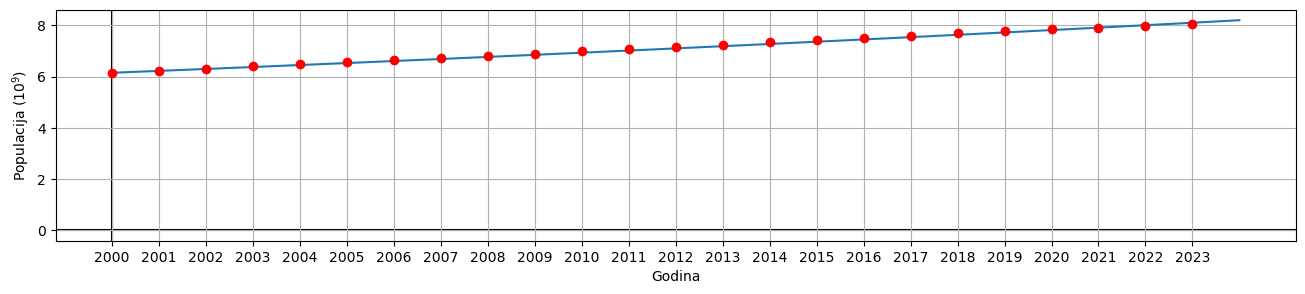

In [7]:
plt.figure(figsize=(16,3))
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.plot(y,gy,label='Predikcija')
plt.plot(populacija,'ro',label='Podaci')
plt.xlabel('Godina')
plt.ylabel('Populacija $(10^9)$')
plt.xticks(np.arange(n),np.arange(2000,2024))
plt.legend
plt.grid();

***

## Линеарни модели

С обзиром да параметри унутар функције модела могу да се нађу  на различитим местима, један од циљева модела јесте једноставна и једнозначна решивост система једначина који су последица интерполационих услова. Ту долазе до изражаја системи линеарних једначина и услови решивости који их прате, [Кронекер-Капелијева теорема](https://en.wikipedia.org/wiki/Rouch%C3%A9%E2%80%93Capelli_theorem).

Проблем одређивања параметара $\lambda_i$ своди се нарешавање система линеарних једначина уколико је интерполациона функција линеарна по непознатим параметрима, тј. ако параметри представљају коефицијенте линеарне комбинације неких безпараметарских функција:
 $$ g(t)=\lambda_0\varphi_0(t)+\lambda_1\varphi_1(t)+\dots+\lambda_m\varphi_m(t).
 $$
Функције $\varphi_i(x)$ из ове линеарне комбинације зовемо базисне функције модела $g$ и њима је одређен тип модела. Услов решивости и јединствености решења повезан је са линеарном независношћу базисних функција модела. Сам интерполациони модел зове се још и линеаран модел.

Да бисмо решили постављени интерполациони проблем користимо интерполационе услове 
$$
f(x_k)=g(x_k),\quad k=0,1,\dots,n.
$$ 
Уз ознаку $f(x_j)\equiv f_j,$ интерполациони услови линеарног модела постају
$$
 \left\{\begin{array}{c@{}c@{}c@{}c}
 \lambda_0\varphi_0(x_0)&+\lambda_1\varphi_1(x_0)&+\dots+\lambda_m\varphi_m(x_0)&=f_0,\\[4pt]
\lambda_0\varphi_0(x_1)&+\lambda_1\varphi_1(x_1)&+\dots+\lambda_m\varphi_m(x_1)&=f_1,\\[4pt]
  &\vdots&&\\
\lambda_0\varphi_0(x_n)&+\lambda_1\varphi_1(x_n)&+\dots+\lambda_m\varphi_m(x_n)&=f_n.
 \end{array}\right.$$
У матричном запису Овај систем линеарних једначина је $A\Lambda=b,$ где су уведене ознаке матрица
 $$A=\begin{bmatrix} \varphi_0(x_0)&\varphi_1(x_0)&\dots&\varphi_m(x_0)\\
\varphi_0(x_1)&\varphi_1(x_1)&\dots&\varphi_m(x_1)\\
\vdots&\vdots&&\vdots\\
\varphi_0(x_n)&\varphi_1(x_n)&\dots&\varphi_m(x_n)\end{bmatrix},\quad 
\Lambda=\begin{bmatrix} \lambda_0\\ \lambda_1\\ \vdots\\ \lambda_m\end{bmatrix},\quad 
b=\begin{bmatrix} f_0\\f_1\\ \vdots\\f_n\end{bmatrix}.$$ 

Систем линеарних једначина је увек сагласан и једнозначног решења када је $A$ регуларна матрица, где је и $n=m.$ Тада јединствено решење система интерполационих услова гласи $\Lambda=A^{-1}b.$ Њиме је одређена вредност непознатих параметара модела $\lambda_i.$

Регуларност матрице $A$ значи линеарну независност њених колона. То се преноси на линеарну независност базисних функција $\varphi_i$ у интерполационим чворовима. Напоменимо да је линеарна независност функција јачи услов од њихове линеарне независности у чворовима. 

***

## Интерполациони полином у стандардном облику

Бавимо се случајем када базисне функције $\varphi_i(x)$ у интерполационом проблему бирамо из скупа алгебарских полинома. За интерполациони полином користићемо стандардне ознаке $P(x)$ уместо опште ознаке функције $g(x).$

Нека је дат скуп података о функцији
$$S=\big\{\big(x_k,f(x_k)\big)\ |\ k=0,1,\dots,n,\ x_i\neq x_j, \ i\neq j\big\}.$$

Када су базисне функције модела полиноми $x^k,\ k=0,1,\dots,n,$ јединственост решења обезебeђена је и карактеристикама Вандермондове детерминанте
$$\begin{vmatrix}1&x_0&x_0^2&\dots&x_0^n\\
1&x_1&x_1^2&\dots&x_1^n\\
\vdots&\vdots&\vdots&&\vdots\\
1&x_n&x_n^2&\dots&x_n^n
\end{vmatrix}
=\prod_{i<j}(x_i-x_j)\neq0\quad\Longleftrightarrow\quad x_i\neq x_j,\ i\neq j.
$$

Интерполација алгебарским полиномом има велики број предности, али и понеку ману. Недостатак интерполационог полинома у стандардном облику јесте операцијска сложеност поступка израчунавања коефицијената $\lambda_i$ и слаба условљеност самог поступка која изузетно расте са поратсом степена полинома $n\in\mathbb{N}.$ Заправо, главни недостатак алгебарског модела јесу особине полинома великог степена које су регистроване кроз нумеричке експерименте и израчунавања у коначној прецизности. Експерименти показују да графици полинома високог степена јако осцилују између интерполационих чворова, нарочито близу крајева интервала интерполације $I_S=\big[\min\{x_0,\dots,x_n\},\max\{x_0,\dots,x_n\}\big]$ и изван њих. Такви велики опсези вредности уносе озбиљне нестабилности у предикције модела заснованих на алгебарским полиномима.  

**Пример 4.** Један од најпознатијих примера полинома који показују разне врсте нумеричке нестабилности су [Вилкинсонови полиноми](https://en.wikipedia.org/wiki/Wilkinson%27s_polynomial). 
То су монични полиноми са целоброним нулама које се бирају узастопне,
$$P(x)=\prod_{k=0}^{n-1}\big(x-(a+k)\big),\quad a\in \mathbb{Z}. $$ 
Другим речима, Вилкинсонови полиноми су монични полиноми степена $n$ који задовољавају интерполационе услове 
$$P(a+k)=0,\quad k=0,1,\dots,n-1.$$
На основу графика неколико Вилкинсонових полинома можемо да уочимо утицај степена полинома на велике скококве у вредностима ових функција. 

In [8]:
x=np.linspace(-5,5,150)
P3=np.poly([0,1,2])
P4=np.poly([0,1,2,3])
P6=np.poly([-2,-1,0,1,2,3])
P8=np.poly([-3,-2,-1,0,1,2,3,4])
y3=np.polyval(P3,x)
y4=np.polyval(P4,x)
y6=np.polyval(P6,x)
y8=np.polyval(P8,x)

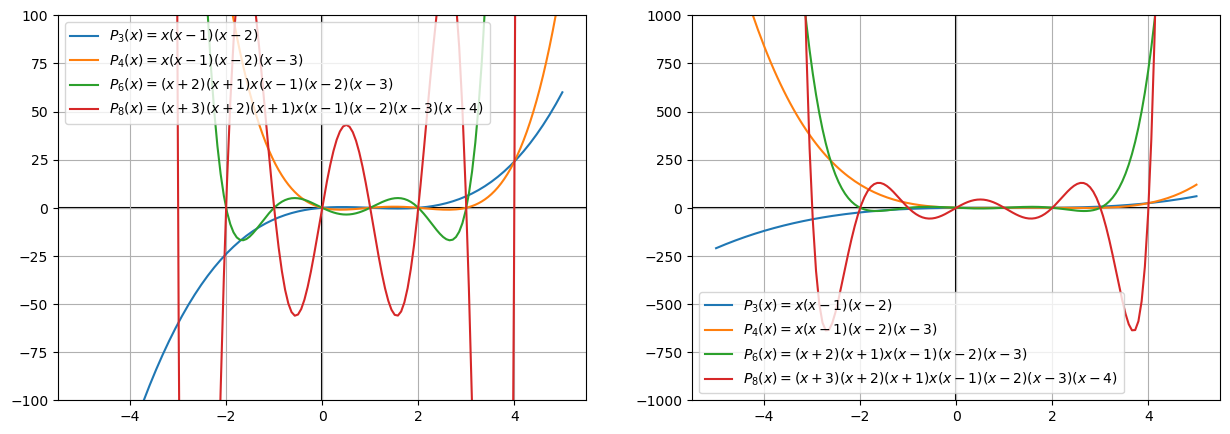

In [9]:
slika, ax=plt.subplots(1,2,figsize=(15,5))

ax[0].axhline(color='black', zorder=-1)
ax[0].axvline(color='black', zorder=-1)
ax[0].plot(x,y3,label='$P_3(x)=x(x-1)(x-2)$')
ax[0].plot(x,y4,label='$P_4(x)=x(x-1)(x-2)(x-3)$')
ax[0].plot(x,y6,label='$P_6(x)=(x+2)(x+1)x(x-1)(x-2)(x-3)$')
ax[0].plot(x,y8,label='$P_8(x)=(x+3)(x+2)(x+1)x(x-1)(x-2)(x-3)(x-4)$')
ax[0].legend()
ax[0].set_ylim(-100,100)
ax[0].grid();

ax[1].axhline(color='black', zorder=-1)
ax[1].axvline(color='black', zorder=-1)
ax[1].plot(x,y3,label='$P_3(x)=x(x-1)(x-2)$')
ax[1].plot(x,y4,label='$P_4(x)=x(x-1)(x-2)(x-3)$')
ax[1].plot(x,y6,label='$P_6(x)=(x+2)(x+1)x(x-1)(x-2)(x-3)$')
ax[1].plot(x,y8,label='$P_8(x)=(x+3)(x+2)(x+1)x(x-1)(x-2)(x-3)(x-4)$')
ax[1].legend()
ax[1].set_ylim(-1000,1000)
ax[1].grid();

Приказани графици указују да интерполациони услови над еквидистантним тачкама могу да дају сличне проблеме. 

***

Због свих наведених проблема који су уочени приликом интерполације алгебарским полиномима, поступак интерполације њима има своје посебне захтеве. Желимо да пронађемо интерполациони полином најмањег степена који испуњава дате интерполационе услове. На основу скупа од $n+1$ података могуће је системом линеарних једначина $P(x_k)=f_k$ на  јединствен начин одредити $n+1$ непознатих коефицијената, што значи да је интерполациона функција 
$$P(x)=\lambda_0\varphi_0(x)+\lambda_1\varphi_1(x)+\dots+\lambda_n\varphi_n(x)$$
полином степена не већег од $n.$

<div class="alert alert-block alert-warning">
<b>Интерполациони проблем:</b> 
    
   Одредити јединствен полином $P_n(x)$ најнижег степена чији график пролази кроз све тачке скупа података $S.$
</div>

Интерполациони услови тада гласе:
$$P_n(x_0)=f(x_0)=f_0,\quad P_n(x_1)=f(x_1)=f_1,\quad\dots\quad P_n(x_n)=f(x_n)=f_n.$$ 

Постављени интерполациони проблем можемо да решимо посматрањем интерполационог полинома у стандардном облику,
$$P_n(x)=p_0x^n+p_1x^{n-1}+\dots+p_{n-1}x+p_n.$$
Интерполациони услови постају систем линеарних једначина по непознатим коефицијентима полинома $P_n(x).$
$$AP=b,\qquad A=\begin{bmatrix} x_0^n&x_0^{n-1}&\dots&x_0&1\\
x_1^n&x_1^{n-1}&\dots&x_1&1\\
\vdots&\vdots&&\vdots&\vdots\\
x_n^n&x_n^{n-1}&\dots&x_n&1\end{bmatrix},\quad 
P=\begin{bmatrix} p_0\\ p_1\\ \vdots\\ p_n\end{bmatrix},\quad 
b=\begin{bmatrix} f_0\\f_1\\ \vdots\\f_n\end{bmatrix}.$$
Решење система линеарних једначина можемо да добијемо позивом наредбе `linalg.solve(A,b)`.

Иначе, уграђена функција NumPy библиотеке којом се добија вектор коефицијената интерполационог полинома је [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Да би се добио интерполациони полином неопходно је поставити аргумент `deg` на $n,$ где је $n+1$ број чворова.

|Функција|Симбол|
|---:|:---:|
|Апроксимација|`polyfit()`|

**Пример 5.**   За функцију $f(x)=\dfrac{\cos(x/\pi)- x + 2 x^2 + 1}{\log(x^2+1)}$ креиран је скуп узорака у $6$ еквидистантних чворова распоређених на интервалу $[1.8,4.5].$ Одредићемо интерполациони полином који пролази кроз ове тачке узорка.

In [10]:
xk=np.linspace(1.8,4.5,6)
fk=(np.cos(xk/np.pi)-xk+2*xk**2+1)/(np.log(1+xk**2))

Креирамо матрицу система $A,$ и потражимо коефицијенте интерполационог полинома као решење система $AP=b,$ где је $P$ вектор непознатих коефицијената.

In [11]:
A=np.vander(xk)
P=np.linalg.solve(A,fk)
P

array([-4.96772563e-03,  9.23250993e-02, -7.00330898e-01,  3.03594713e+00,
       -4.47690835e+00,  5.94465606e+00])

In [12]:
np.polyfit(xk,fk,5)

array([-4.96772563e-03,  9.23250993e-02, -7.00330898e-01,  3.03594713e+00,
       -4.47690835e+00,  5.94465606e+00])

Проверићемо кроз графике добијени резултат.

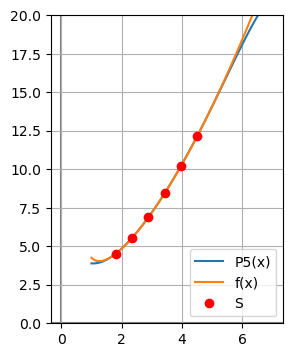

In [13]:
x=np.linspace(1,7,100)
ip=np.polyval(P,x)
f=(np.cos(x/np.pi)-x+2*x**2+1)/(np.log(1+x**2))

slika=plt.figure(figsize=(3,4))
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.plot(x,ip,label="P5(x)")
plt.plot(x,f,label="f(x)")
plt.plot(xk,fk,'ro',label="S")
plt.ylim([0,20])
plt.legend()
plt.grid();

***

## Лагранжова интерполација

Циљ Лагранжове интерполације је утврђивање полиномске базе $\varphi_i(x),\ {\rm st}(\varphi_i)\leq n,\ i=0,1,\dots,n,$  за коју полином
$$P_n(x)=f_0\,\varphi_0(x)+f_1\,\varphi_1(x)+\dots+f_n\,\varphi_n(x),\qquad {\rm st}(P_n)\leq n,$$
задовољава интерполационе услове $P_n(x_i)=f_i.$ У развијеном облику они гласе:

\begin{align}
\begin{cases}
f_0=f_0\varphi_0(x_0)+f_1\varphi_1(x_0)+\dots+f_n\varphi_n(x_0)\\
f_1=f_0\varphi_0(x_1)+f_1\varphi_1(x_1)+\dots+f_n\varphi_n(x_1)\\
\vdots\\
f_n=f_0\varphi_0(x_n)+f_1\varphi_1(x_n)+\dots+f_n\varphi_n(x_n)
\end{cases}
\Longleftrightarrow
\begin{bmatrix}
f_0\\f_1\\\vdots\\ f_n
\end{bmatrix}=
\begin{bmatrix}
\varphi_0(x_0)&\varphi_1(x_0)&\dots&\varphi_n(x_0)\\
\varphi_0(x_1)&\varphi_1(x_1)&\dots&\varphi_n(x_1)\\
\vdots&\vdots&&\vdots\\
\varphi_0(x_n)&\varphi_1(x_n)&\dots&\varphi_n(x_n)
\end{bmatrix}
\begin{bmatrix}
f_0\\f_1\\\vdots\\ f_n
\end{bmatrix}
\end{align}


С обзиром да за сваки вектор узорака функције матрица $A=[\varphi_i(x_j)]$ враћа исти тај вектор, она мора бити јединична матрица.
$$A=I\quad\Longleftrightarrow\quad 
\begin{bmatrix}
\varphi_0(x_0)&\varphi_1(x_0)&\dots&\varphi_n(x_0)\\
\varphi_0(x_1)&\varphi_1(x_1)&\dots&\varphi_n(x_1)\\
\vdots&\vdots&&\vdots\\
\varphi_0(x_n)&\varphi_1(x_n)&\dots&\varphi_n(x_n)
\end{bmatrix}=
\begin{bmatrix}1&0&\dots&0\\0&1&\dots&0\\
\vdots&\vdots&&\vdots\\0&0&\dots&1\end{bmatrix}$$

Поредећи колоне матрица $A$ и $I$ долазимо до услова којима су у потпуности описани елементи Лагранжове базе:
\begin{align}
    &\varphi_0(x_0)=1,&&\varphi_0(x_1)=0,&&\dots&&\varphi_0(x_n)=0,\\
    &\varphi_1(x_0)=0,&&\varphi_1(x_1)=1,&&\dots&&\varphi_1(x_n)=0,\\
    &\vdots\\
    &\varphi_n(x_0)=0,&&\varphi_n(x_1)=0,&&\dots&&\varphi_n(x_n)=1,
\end{align}
што краће записујемо 
$$\varphi_j(x_i)=\delta_{ij}=\begin{cases}
1,&i=j,\\0,&i\neq j. \end{cases}$$ 
Дакле, за полином $\varphi_j(x)$ степена не већег од $n$ познајемо тачно $n$ његових нула $x_i,\ i\neq j.$ Због тога је $\varphi_j(x)=a_jw_j(x),$ где је $w_j(x)=\prod_{i\neq j}(x-x_i)$ монични полином са уоченим нулама. Водећи коефицијент $a_j$ добијамо из услова $\varphi_j(x_j)=1:$
$$1=\varphi_j(x_j)=a_jw_j(x_j)\quad\Longrightarrow\quad a_j=\dfrac{1}{w_j(x_j)}=\dfrac{1}{\prod_{i\neq j}(x_j-x_i)}\,.$$
На тај начин долазимо до израза за елементе Лагранжове базе.

За скуп података 
$$S=\big\{\big(x_k,f(x_k)\big)\ |\ k=0,1,\dots,n,\ x_i\neq x_j, \ i\neq j\big\}$$
полиноми Лагранжове базе гласе:
$$w_j(x)=\prod_{i\neq j}(x-x_i),\qquad L_j(x)=\dfrac{w_j(x)}{w_j(x_j)}\,.$$

**Пример 6.** Приметимо да Лагранжова база степена $n$ садржи $n+1$ полинома. Због тога их често означавамо са $L_{j,n},\ j=0,1,\dots,n,$ како бисмо нагласили њихов степен. Тако полиноми Лагранжове базе малих степена $0,1$ и $2$ гласе:
\begin{align}
&L_{0,0}=1,&& &&\\
&L_{0,1}=\dfrac{x-x_1}{x_0-x_1},&& L_{1,1}=\dfrac{x-x_0}{x_1-x_0},&&\\
&L_{0,2}=\dfrac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)},&& L_{1,2}=\dfrac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)},
&&L_{2,2}=\dfrac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{align}

***

**Пример 7.** За серију функција узоркованих над чворовима $x_k$ креираћемо интерполационе полиноме користећи Лагранжов базис. Коефицијенте базних полинома (у односу на стандардну базу) сместићемо унутар врста матрице $L.$

Функције за интерполацију су:
\begin{align}
&f_1(x)=\sin(6x)+\sin(60e^x), &&f_2(x)=\dfrac{1}{1+10(x+1.5)^2} + \dfrac{1}{\sqrt{1+10(x-0.5)^2}},\\
&f_3(x)= (3+\sin(\pi x)+\sin(e^{0.8\sin(\pi x)+0.7}))e^{\pi x/10}, && f_4(x)=\dfrac{1-2x^2}{\cos(e^{2x})+2}
\end{align}

Чворови су: $x_k\in\{-0.66,-0.54,-0.47,-0.33,-0.21,-0.12,0.03,0.11,0.26,0.37,0.41,0.81\}.$

In [14]:
xk=np.array([-0.66,-0.54,-0.47,-0.33,-0.21,-0.12,0.03,0.11,0.26,0.37,0.41,0.81])
n=xk.size
L=np.zeros([n,n]) 
for i in range(n):
    w=np.polymul(np.poly(xk[:i]),np.poly(xk[i+1:]))
    alfa=np.polyval(w,xk[i])
    L[i]=w/alfa    

Можемо да погледамо графике ових базних функција како бисмо се уверили да заиста имају својства $L_j(x_i)=\begin{cases}
1,&i=j,\\0,&i\neq j. \end{cases}$

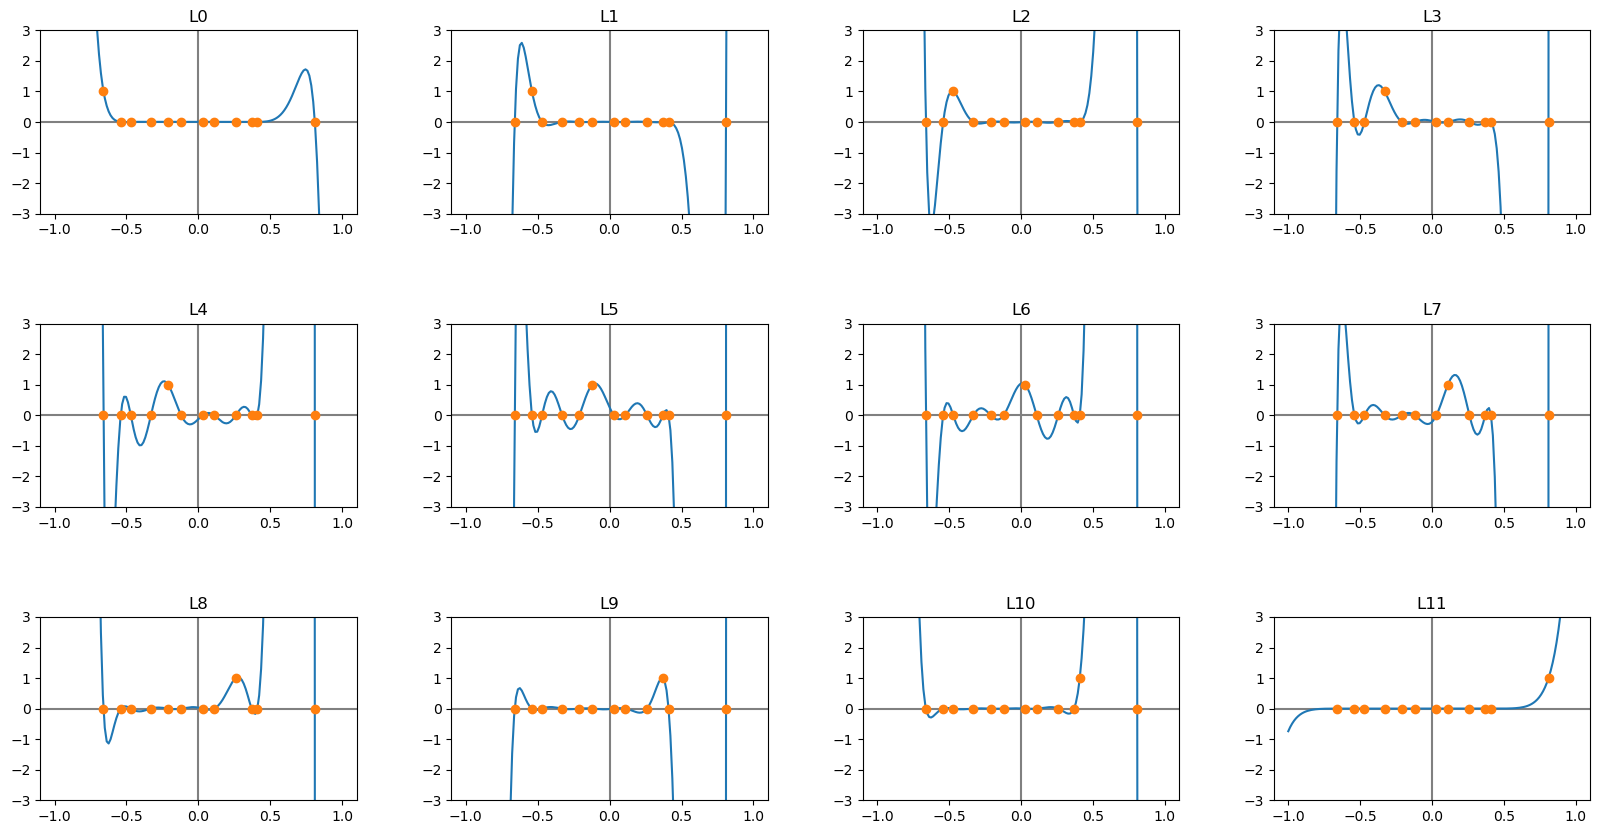

In [15]:
x=np.linspace(-1,1,150)
slika = plt.figure(figsize=(20,10)) 
slika.subplots_adjust(hspace=0.6, wspace = 0.3)
I=np.eye(n)

for i in range(12):
    Li=np.polyval(L[i],x)
    plt.subplot(3,4,i+1)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.plot(x,Li)
    plt.plot(xk,I[i],'o')
    plt.ylim([-3,3])
    plt.title("L"+str(i))

Креираћемо сада узорке функција које желимо да интерполирамо у наведеним чворовима. Вредности функција $f_i(x_k)$ биће смештене дуж врста матрице $Fk.$

In [16]:
#uzorkovanje funkcija f1,f2,f3 i f4    
Fk=np.empty([4,n])
Fk[0]=np.sin(6*xk)+np.sin(60*np.exp(xk)) 
Fk[1]=1/(1+10*(xk+1.5)**2)+np.sqrt(1+10*(xk-0.5)**2)
Fk[2]=(3+np.sin(np.pi*xk)+np.sin(np.exp(0.8*np.sin(np.pi*xk)+0.7)))*np.exp(np.pi*xk/10)
Fk[3]=(1-2*xk**2)/(np.cos(np.exp(2*xk))+2)

Сада можемо да формирамо интерполационе полиноме, тј. векторе њихових коефицијената, као линеарне комбинације базних функција
$$P_k(x)=f_0L_0(x)+f_1L_1(x)+\dots+f_{11}L_{11}(x).$$
Коефицијенти интерполационих полинома $P_k(x)$ смештени су у врстама матрице $P.$

In [17]:
#formiranje matrice koeficijenata interpolacionih polinoma
P=Fk@L  
#svaka vrsta matrice P sadrži koeficijente jednog interpolacionog polinoma  

Добијене резултате најбоље оцењујемо графички.

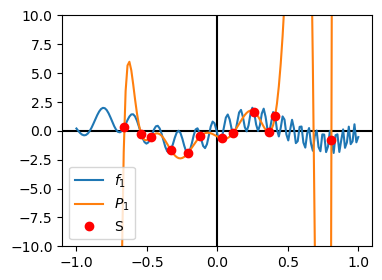

In [18]:
f1=np.sin(6*x)+np.sin(60*np.exp(x))
P1=np.polyval(P[0],x)
slika = plt.figure(figsize=(4,3)) 
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.plot(x,f1,label=r'$f_1$')
plt.plot(x,P1,label=r'$P_1$')
plt.plot(xk,Fk[0],'ro',label="S")
plt.ylim([-10,10])
plt.legend();

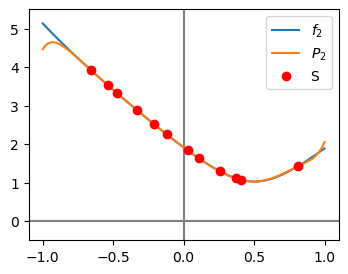

In [19]:
f2=1/(1+10*(x+1.5)**2)+np.sqrt(1+10*(x-0.5)**2)
P2=np.polyval(P[1],x)
slika = plt.figure(figsize=(4,3)) 
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.plot(x,f2,label=r'$f_2$')
plt.plot(x,P2,label=r'$P_2$')
plt.plot(xk,Fk[1],'ro',label="S")
plt.ylim([-0.5,5.5])
plt.legend();

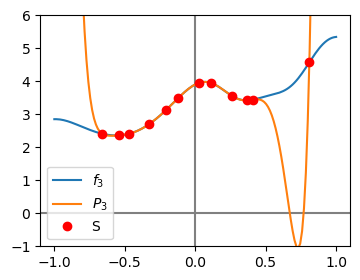

In [20]:
f3=(3+np.sin(np.pi*x)+np.sin(np.exp(0.8*np.sin(np.pi*x)+0.7)))*np.exp(np.pi*x/10)
P3=np.polyval(P[2],x)
slika = plt.figure(figsize=(4,3)) 
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.plot(x,f3,label=r'$f_3$')
plt.plot(x,P3,label=r'$P_3$')
plt.plot(xk,Fk[2],'ro',label="S")
plt.ylim([-1,6])
plt.legend();

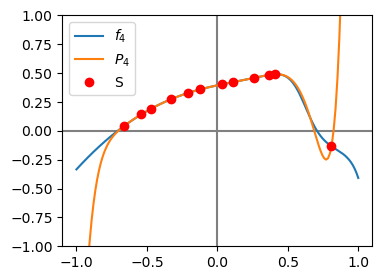

In [21]:
f4=(1-2*x**2)/(np.cos(np.exp(2*x))+2)
P4=np.polyval(P[3],x)
slika = plt.figure(figsize=(4,3)) 
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.plot(x,f4,label=r'$f_4$')
plt.plot(x,P4,label=r'$P_4$')
plt.plot(xk,Fk[3],'ro',label="S")
plt.ylim([-1,1])
plt.legend();

***

Идеја иза Лагранжове базе је веома корисна за формирање функција са задатим вредностима на неком скупу чворова и у општијој ситуацији.

**Пример 8.** Претпоставимо да имамо две функције $g_0(x)$ и $g_1(x)$ које испуњавају жељене услове у неким двема тачкама:
$$g_0(x_0)=f_0,\qquad   g_1(x_1)=f_1.$$
Тада фукција коју зовемо Лагранжова комбинација
$$g(x)=\dfrac{x-x_1}{x_0-x_1}g_0(x)+\dfrac{x-x_0}{x_1-x_0}g_1(x)$$
испуњава услове $g(x_0)=f_0$ i $g(x_1)=f_1.$ Заиста,
\begin{align}
     g(x_0)&=\dfrac{x_0-x_1}{x_0-x_1}g_0(x_0)+\dfrac{x_0-x_0}{x_1-x_0}g_1(x_0)=g_0(x_0)=f_0 ,\\
     g(x_1)&=\dfrac{x_1-x_1}{x_0-x_1}g_0(x_1)+\dfrac{x_1-x_0}{x_1-x_0}g_1(x_1)=g_1(x_1)=f_1.
\end{align}
Приметимо да Уколико се у некој тачки $a\in\mathbb{R}$ функције $g_0$ и $g_1$ поклапају, тј. ако је  $g_0(a)=g_1(a)=b,$ тада је
\begin{align}
    g(a)&=\dfrac{a-x_1}{x_0-x_1}g_0(a)+\dfrac{a-x_0}{x_1-x_0}g_1(a)\\
    &=\dfrac{(a-x_1)-(a-x_0)}{x_0-x_1}b
    =\dfrac{x_0-x_1}{x_0-x_1}b=b.
\end{align}

***

Пример 8 је основа алгоритма за израчунавање вредности интерполационог полинома $P_n(x)$ у некој тачки $x=a,$ а да том приликом сам израз за полином није познат. [Невилов алгоритам](https://en.wikipedia.org/wiki/Neville%27s_algorithm) је поступак којим се то извршава.

## Невилов алгоритам

Невилов алгоритам представља поступак израчунавања вредности интерполационог полинома $P_n(x)$ у некој тачки $x=a,$ а да том приликом није потребно познавање експлицитног облика самог полинома, тј. његових координата у било којој бази.

Претпоставимо да је потребно израчунати вредност интерполационог полинома $P_n(x)$ у тачки $x=a\not\in \{x_0,x_1,\dots,x_n\},$ на основу података о функцији $f$ у чворовима  $\{x_0,x_1,\dots,x_n\},$
$$S=\big\{(x_k,f_k),\ k=0,1,\dots,n\big\}.$$

Означимо са $p_{ij}(x),\ 0\leq i\leq j\leq n,$ полином који интерполира функцију $f$ на подскупу података 
$$S_{ij}=\{(x_k,f_k),\ k=i,i+1,\dots,j\}\subseteq S.$$ 
Приметимо да полином $p_{ij}(x)$ користи скуп од $j-i+1$ података, па је $p_{ij}(x)$ степена не већег од $j-i.$ На основу уведених ознака јасно је да је $P_n(x)=p_{0n}(x),$ тј. интерполациони полином на скупу $S$ је специјално интерполациони полином на скупу $S_{0n}\equiv S.$

С обзиром да су полиноми $p_{ii}(x),\ 0\leq i\leq n,$ степена $i-i=0,$ тј. константни полиноми, то за њих важи 
$$p_{ii}(x)=f(x_i)=f_i,\quad 0\leq i\leq n.$$
Полиноми $p_{ij}(x)$ повезани су рекурентним релацијама које су кључ Невиловог алгоритма. Идеја је једноставна: 
       
> Два полинома  $p_{i\,j-1}(x)$ и $p_{i+1\,j}(x),$ истог степена $j-i-1,$ поклапају се на скупу података $S_{i\,j-1}\cap S_{i+1\,j}=S_{i+1\,j-1}\subset S_{ij},$ тј. поклапају се у чворовима $x_{i+1},x_{i+2},\dots,x_{j-1},$ 
$$p_{i\,j-1}(x_k)=f_k,\quad p_{i+1\,j}(x_k)=f_k,\qquad (\forall k)(i+1\leq k\leq j-1).$$
Осим тога, сваки од полинома $p_{i\,j-1}(x)$ и $p_{i+1\,j}(x)$ носи битне информације у још по једном чвору: $x_i\in S_{ij}$ и $x_j\in S_{ij}$ респективно,
$$p_{i\,j-1}(x_i)=f_i,\qquad p_{i+1\,j}(x_j)=f_j.$$
Лагранжовом комбинацијом ова два полинома можемо да креирамо нов полином степена $j-i$ који ће интерполирати скуп податка $S_{ij}.$ На основу особина Лагаранжове комбинације показаних у примеру 8, за полиноме $p_{ij}(x)$ заиста важе инетрполациони услови: $p_{ij}(x_k)=f_k,\ i\leq k\leq j.$

Због ове једноставне идеје, за $i<j$ важи једнакост 
\begin{align}   p_{ij}(x)&=\dfrac{x-x_j}{x_i-x_j}p_{i\,j-1}(x)+\dfrac{x-x_i}{x_j-x_i}p_{i+1\,j}(x)\\[8pt]     
&=\dfrac{(x-x_j)p_{i\,j-1}(x)-(x-x_i)p_{i+1\,j}(x)}{x_i-x_j}.
\end{align} 
Њом се генерише троугаони алгоритам израчунавања вредности полинома $P(x)$ у произвољној тачки $x=a.$

На основу почетних вредности узорака функције
$$p_{ii}(a)=f(x_i)=f_i,\quad 0\leq i\leq n,$$
формира се троугаона шема са слике доле, на основу формула
$$p_{ij}(a)=\dfrac{(a-x_j)p_{i\,j-1}(a)-(a-x_i)p_{i+1\,j}(a)}{x_i-x_j}\,,\quad i<j.$$

<div>
   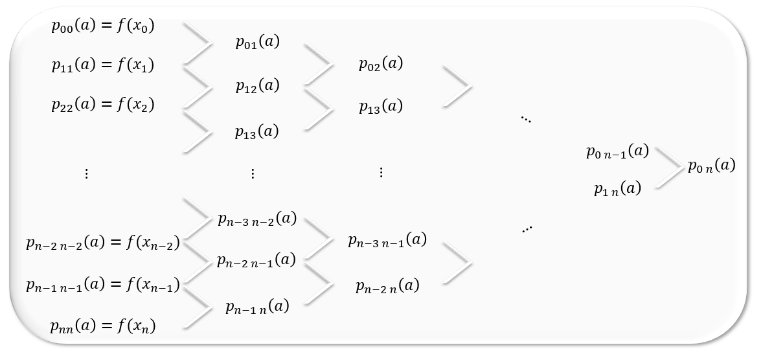  
</div>

Последња израчуната вредност $p_{0n}(a)$ је вредност интерполационог полинома у $x=a.$

***

Имајући у виду могућности векторизације израчунавања које носе NumPy низови, Невилов алгоритам може да се користи за израчунавање вредности полинома у више различитих тачака. То је тема наредног примера.

**Пример 9.** Искористићемо податке за функцију $f_3(x)= (3+\sin(\pi x)+\sin(e^{0.8\sin(\pi x)+0.7}))e^{\pi x/10}$ из примера 7 за израчунавање вредности интерполационог полинома $P_3(x)$.

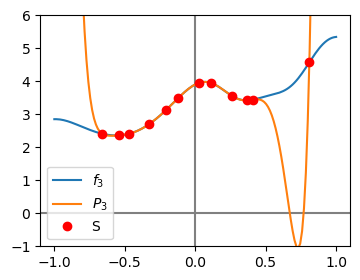

In [22]:
#podsetnik na interpolacioni polinom, funkciju i skup podatka
slika = plt.figure(figsize=(4,3)) 
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.plot(x,f3,label=r'$f_3$')
plt.plot(x,P3,label=r'$P_3$')
plt.plot(xk,Fk[2],'ro',label="S")
plt.ylim([-1,6])
plt.legend();

Имплементираћемо Невилов алгоритам за израчунавање вредности интерполационог полинома у тачкама $a\in\{-0.5,-0.1,0.2,0.6,0.9\},$ према формули
$$p_{ij}(a)=\dfrac{(a-x_j)p_{i\,j-1}(a)-(a-x_i)p_{i+1\,j}(a)}{x_i-x_j}\,,\quad i<j.$$
За почетак спровешћемо алгоритам за израчунавање вредности у једној тачки. Након тога ћемо код прилагодити за израчунавања у више тачака.

Користићемо један вектор `pii` за смештај свих међурезултата $p_{ij}(a).$ Коначна вредност биће први елемент вектора `pii`, тј. `pii[0]`. Како би имплементација шема одговарала употребљеним границама индекса приметимо да је укупан број чворова једнак $n+1,$ где је $n$ последњи индекс. Променљива `n=xk.size` је заправо величина $n+1$ са горњих шема. Због читљивости кода је прилагођавамо.

In [23]:
print(n)
n-=1
n

12


11

Шема алгоритма из корака у корак дата је на наредним сликама.

1. итерација
<div>
   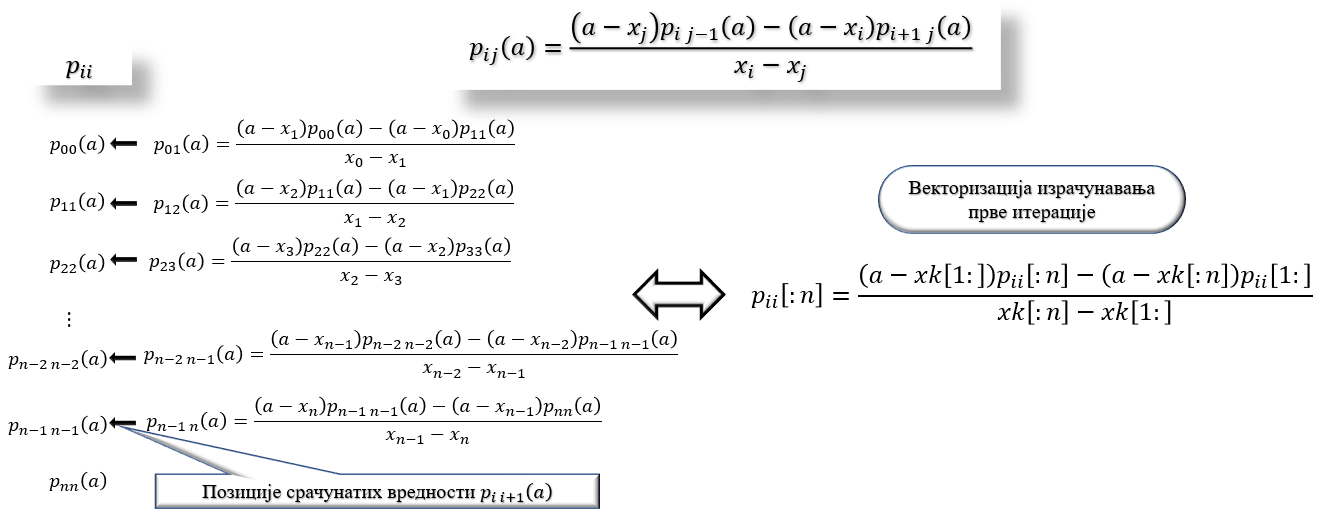  
</div>

2. итерација
<div>
   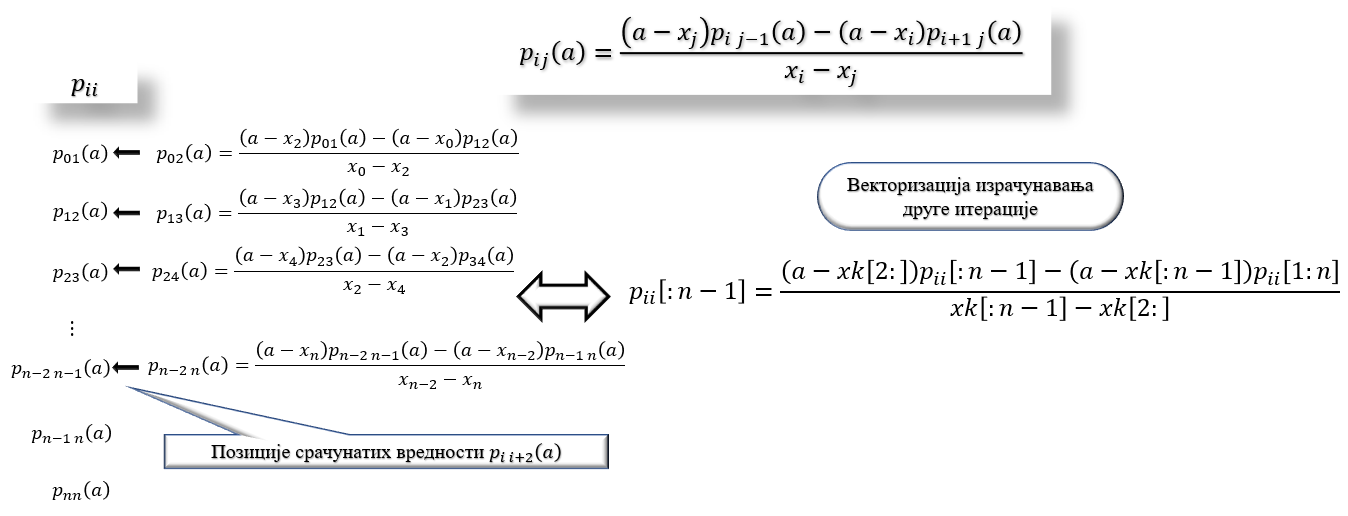  
</div>

Настављајући овакву анализу видимо да се следећи парови вредности $p_{ij}(a)$ увек налазе у суседним позицијама вектора `pii`.
На основу свега уочавамо правилност у формули за израчунавање уз векторизацију:
$$p_{ii}[:n-i]=\dfrac{(a-x_k[i+1:])p_{ii}[:n-i]-(a-x_k[:n-i])p_{ii}[1:n-i+1]}{x_k[:n-i]-x_k[i+1:]}.$$

In [24]:
pii=Fk[2].copy()
a=0.75
axk=a-xk;  #vektor razlika a-x_k
for i in range(n):
    pii[:n-i]=(axk[i+1:]*pii[:n-i]-axk[:n-i]*pii[1:n-i+1])/(xk[:n-i]-xk[i+1:])

Проверавамо добијени резултат графички.

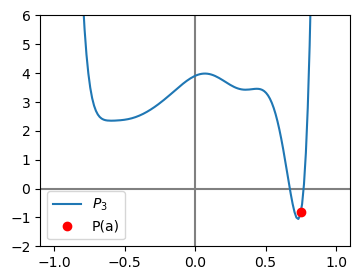

In [25]:
slika = plt.figure(figsize=(4,3)) 
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.plot(x,P3,label=r'$P_3$')
plt.plot(a,pii[0],'ro',label="P(a)")
plt.ylim([-2,6])
plt.legend();

Да би Невилов алгоритам радио за низ вредности смештених унутар вектора $a=\begin{bmatrix}a_0&a_1&\dots&a_m\end{bmatrix}^T$ претходни код треба прилагодити таквим улазним подацима. Другим речима, морамо да радимо са матрицом вектора $[p_{ii}(a_j)]\in\mathcal{M}_{(n+1)\times(m+1)}.$
Невилов алгоритам би кроз итерације требало да производи следеће матрице вредности:
\begin{align}
P_{ii}&=\begin{bmatrix}p_{00}(a_0)&p_{00}(a_1)&\dots&p_{00}(a_m)\\
p_{11}(a_0)&p_{11}(a_1)&\dots&p_{11}(a_m)\\
p_{22}(a_0)&p_{22}(a_1)&\dots&p_{22}(a_m)\\
\vdots&\vdots&&\vdots\\
p_{n-2\,n-2}(a_0)&p_{n-2\,n-2}(a_1)&\dots&p_{n-2\,n-2}(a_m)\\
p_{n-1\,n-1}(a_0)&p_{n-1\,n-1}(a_1)&\dots&p_{n-1\,n-1}(a_m)\\
p_{nn}(a_0)&p_{nn}(a_1)&\dots&p_{nn}(a_m)
\end{bmatrix}\mapsto
\begin{bmatrix}p_{01}(a_0)&p_{01}(a_1)&\dots&p_{01}(a_m)\\
p_{12}(a_0)&p_{12}(a_1)&\dots&p_{12}(a_m)\\
p_{23}(a_0)&p_{23}(a_1)&\dots&p_{23}(a_m)\\
\vdots&\vdots&&\vdots\\
p_{n-2\,n-1}(a_0)&p_{n-2\,n-1}(a_1)&\dots&p_{n-2\,n-1}(a_m)\\
p_{n-1\,n}(a_0)&p_{n-1\,n}(a_1)&\dots&p_{n-1\,n}(a_m)\\
p_{nn}(a_0)&p_{nn}(a_1)&\dots&p_{nn}(a_m)
\end{bmatrix}\\
&\mapsto
\begin{bmatrix}p_{02}(a_0)&p_{02}(a_1)&\dots&p_{02}(a_m)\\
p_{13}(a_0)&p_{13}(a_1)&\dots&p_{13}(a_m)\\
p_{24}(a_0)&p_{24}(a_1)&\dots&p_{24}(a_m)\\
\vdots&\vdots&&\vdots\\
p_{n-2\,n}(a_0)&p_{n-2\,n}(a_1)&\dots&p_{n-2\,n}(a_m)\\
p_{n-1\,n}(a_0)&p_{n-1\,n}(a_1)&\dots&p_{n-1\,n}(a_m)\\
p_{nn}(a_0)&p_{nn}(a_1)&\dots&p_{nn}(a_m)
\end{bmatrix}\mapsto\dots\mapsto\begin{bmatrix}
p_{0n}(a_0)&p_{0n}(a_1)&\dots&p_{0n}(a_m)\\
p_{1n}(a_0)&p_{1n}(a_1)&\dots&p_{1n}(a_m)\\
p_{2n}(a_0)&p_{2n}(a_1)&\dots&p_{2n}(a_m)\\
\vdots&\vdots&&\vdots\\
p_{n-2\,n}(a_0)&p_{n-2\,n}(a_1)&\dots&p_{n-2\,n}(a_m)\\
p_{n-1\,n}(a_0)&p_{n-1\,n}(a_1)&\dots&p_{n-1\,n}(a_m)\\
p_{nn}(a_0)&p_{nn}(a_1)&\dots&p_{nn}(a_m)
\end{bmatrix}.
\end{align}
На тај начин формуле $$p_{ij}(a_s)=\dfrac{(a_s-x_j)p_{i\,j-1}(a_s)-(a_s-x_i)p_{i+1\,j}(a_s)}{x_i-x_j}\,,\quad i<j,$$ постају трансформације врста ових матрица у алгоритму.

Постављамо иницијелне вредности матрице $P_{ii}:$

In [26]:
A=np.array([-0.5,-0.1,0.2,0.6,0.9])
m=A.size
Pii=np.outer(Fk[2],np.ones(m))
Pii

array([[2.40944584, 2.40944584, 2.40944584, 2.40944584, 2.40944584],
       [2.36118603, 2.36118603, 2.36118603, 2.36118603, 2.36118603],
       [2.40938333, 2.40938333, 2.40938333, 2.40938333, 2.40938333],
       [2.69272584, 2.69272584, 2.69272584, 2.69272584, 2.69272584],
       [3.11802745, 3.11802745, 3.11802745, 3.11802745, 3.11802745],
       [3.49509696, 3.49509696, 3.49509696, 3.49509696, 3.49509696],
       [3.95632006, 3.95632006, 3.95632006, 3.95632006, 3.95632006],
       [3.95335554, 3.95335554, 3.95335554, 3.95335554, 3.95335554],
       [3.55831426, 3.55831426, 3.55831426, 3.55831426, 3.55831426],
       [3.42370677, 3.42370677, 3.42370677, 3.42370677, 3.42370677],
       [3.44455591, 3.44455591, 3.44455591, 3.44455591, 3.44455591],
       [4.5742393 , 4.5742393 , 4.5742393 , 4.5742393 , 4.5742393 ]])

Као припрему направићемо матрицу разлика $[a_i-x_j]\in\mathcal{M}_{(n+1)\times(m+1)}:$
$$Axk=\begin{bmatrix}a_0-x_0&a_1-x_0&\dots&a_m-x_0\\a_0-x_1&a_1-x_1&\dots&a_m-x_1\\
\vdots&\vdots&&\vdots\\
a_0-x_n&a_1-x_n&\dots&a_m-x_n\end{bmatrix}.$$

In [27]:
Axk=np.outer(A,np.ones(n+1))-xk
Axk=Axk.T
Axk

array([[ 0.16,  0.56,  0.86,  1.26,  1.56],
       [ 0.04,  0.44,  0.74,  1.14,  1.44],
       [-0.03,  0.37,  0.67,  1.07,  1.37],
       [-0.17,  0.23,  0.53,  0.93,  1.23],
       [-0.29,  0.11,  0.41,  0.81,  1.11],
       [-0.38,  0.02,  0.32,  0.72,  1.02],
       [-0.53, -0.13,  0.17,  0.57,  0.87],
       [-0.61, -0.21,  0.09,  0.49,  0.79],
       [-0.76, -0.36, -0.06,  0.34,  0.64],
       [-0.87, -0.47, -0.17,  0.23,  0.53],
       [-0.91, -0.51, -0.21,  0.19,  0.49],
       [-1.31, -0.91, -0.61, -0.21,  0.09]])

In [28]:
for i in range(n):
    Pii[:n-i]=((Axk[i+1:]*Pii[:n-i]-Axk[:n-i]*Pii[1:n-i+1]).T/(xk[:n-i]-xk[i+1:])).T

Проверавамо добијени резултат графички.

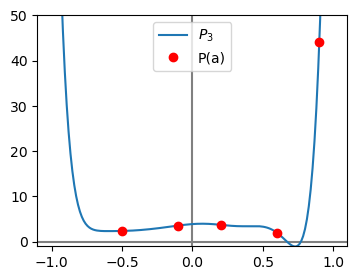

In [29]:
slika = plt.figure(figsize=(4,3)) 
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.plot(x,P3,label=r'$P_3$')
plt.plot(A,Pii[0],'ro',label="P(a)")
plt.ylim([-1,50])
plt.legend();

***

## Чебишевљеви чворови

Избор еквивдистанатних чворова има своје предности у атутоматизацији поступка узорковања функција. 
Избор еквидистантних чворова не представља добру стратегију уколико посматрамо подржавање геометрије скупа података $S=\big\{\big(x_k,f(x_k)\big)\ |\ k=0,1,\dots,n,\ x_i\neq x_j, \ i\neq j\big\}$ интерполационом функцијом полиномског типа. Проблеми се нарочито испољавају на крајевима области интерполације. Због тога је добра идеја повећање густине чворова управо у тој области интерполације. То се може постићи аутоматизованим израчунавањем тзв. Чебишевљевих чворова.

**Пример 10.** Посматармо сегмент $[\pi,2\pi]$ и еквидистантне тачке $\theta_k,\ k=0,1,\dots,n,$ на њему. Трансформацијом $x_k=\cos\theta_k\in[-1,1]$ добијамо једну врсту Чебишевљевих чворова. Њихова карактеристика је повећање густине чворова ка крајевима интервала $[-1,1].$ 

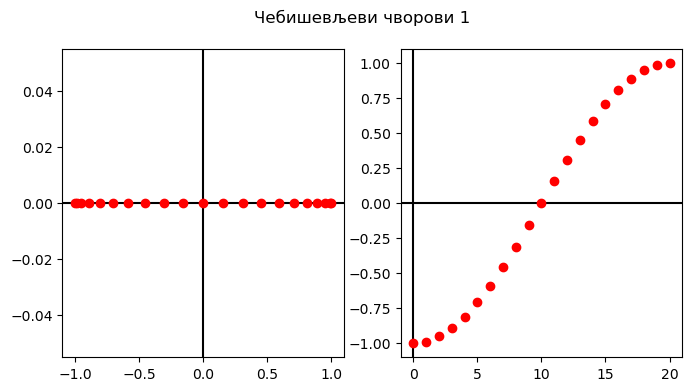

In [30]:
thk=np.linspace(np.pi,2*np.pi,21)
chk=np.cos(thk)

slika, ax = plt.subplots(1, 2,figsize=(8,4))
slika.suptitle('Чебишевљеви чворови 1')

plt.subplot(1,2,1)
plt.plot(chk,np.zeros(21),'ro')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1);

plt.subplot(1,2,2)
plt.plot(chk,'ro')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1);

Уколико је потребно да чворови буду са неког другог сегмента $[a,b]$ користимо једноставну линеарну трансформацију $lt:[-1,1]\mapsto[a,b],$ 
$$lt(x)=a+\dfrac{b-a}2(x+1).$$

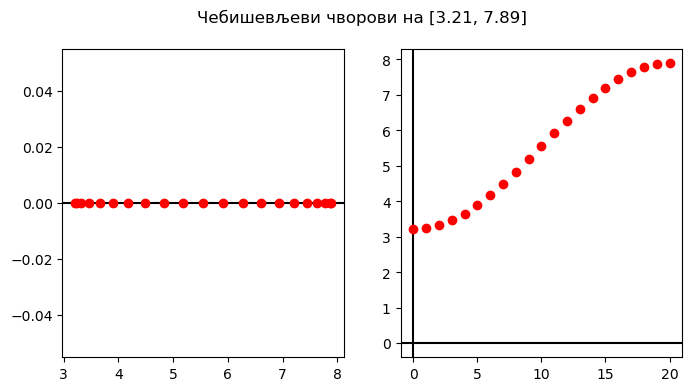

In [31]:
thk=np.linspace(np.pi,2*np.pi,21)
chk=np.cos(thk)
a, b=3.21, 7.89
abk=a+(b-a)*(chk+1)/2

slika, ax = plt.subplots(1, 2,figsize=(8,4))
slika.suptitle('Чебишевљеви чворови на [3.21, 7.89]')

plt.subplot(1,2,1)
plt.plot(abk,np.zeros(21),'ro')
plt.axhline(color='black', zorder=-1)
#plt.axvline(color='black', zorder=-1);

plt.subplot(1,2,2)
plt.plot(abk,'ro')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1);

Исте карактеристике нагомилавања показује друга врста Чебишевљевих чворова, $c_k=\cos\left(\theta_k-\frac{\pi}{2n}\right).$

In [32]:
n=21
zhk=thk-np.pi/(2*n)
nchk=np.cos(zhk)

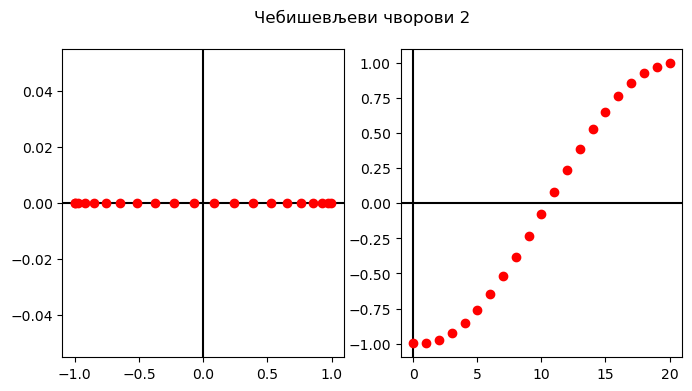

In [33]:
slika, ax = plt.subplots(1, 2,figsize=(8,4))
slika.suptitle('Чебишевљеви чворови 2')

plt.subplot(1,2,1)
plt.plot(nchk,np.zeros(21),'ro')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1);

plt.subplot(1,2,2)
plt.plot(nchk,'ro')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1);

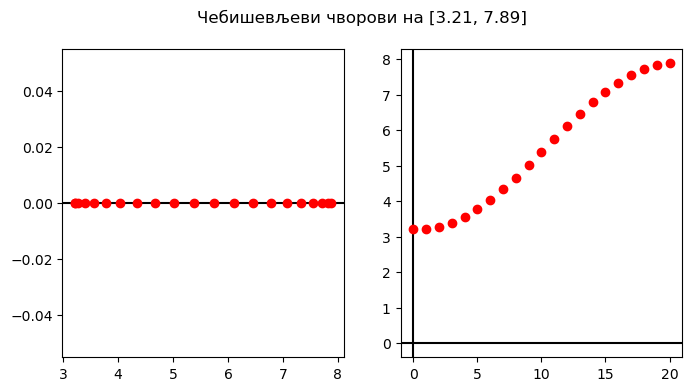

In [34]:
abk=a+(b-a)*(nchk+1)/2

slika, ax = plt.subplots(1, 2,figsize=(8,4))
slika.suptitle('Чебишевљеви чворови на [3.21, 7.89]')

plt.subplot(1,2,1)
plt.plot(abk,np.zeros(21),'ro')
plt.axhline(color='black', zorder=-1)
#plt.axvline(color='black', zorder=-1);

plt.subplot(1,2,2)
plt.plot(abk,'ro')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1);

***

**Пример 11.** За функцију $f_3(x)= \Big(3+\sin(\pi x)+\sin\big(e^{0.8\sin(\pi x)+0.7}\big)\Big)e^{\pi x/10}$ упоредићемо интерполационе полиноме са различитим типовима узорковања, истим бројем чворова. Користићемо чворове $x_k$ из примера 7, затим исти број Чебишевљевих чворова 1 и 2, као и исти броје еквидистантних чворова на $[-1,1].$ Добијени  интерполациони полиноми $P_3(x),\ S_3(x),\ U_3(x)$ и $Q_3(x)$ биће поређени преко својих графика.

In [35]:
#podsetnik na interpolacioni polinom, funkciju i skup podatka
xk=np.array([-0.66,-0.54,-0.47,-0.33,-0.21,-0.12,0.03,0.11,0.26,0.37,0.41,0.81])
n=xk.size
x=np.linspace(-1,1,150)

In [36]:
def F3(x):
    return((3+np.sin(np.pi*x)+np.sin(np.exp(0.8*np.sin(np.pi*x)+0.7)))*np.exp(np.pi*x/10))

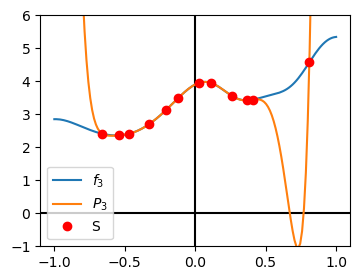

In [37]:
slika = plt.figure(figsize=(4,3)) 
plt.plot(x,f3,label=r'$f_3$')
plt.plot(x,P3,label=r'$P_3$')
plt.plot(xk,Fk[2],'ro',label="S")
plt.ylim([-1,6])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.legend();

Можемо да одредимо и максимално одступање вредности између две функције унутар области интерполације, као и аргумент $x$ у коме се дешава.

In [38]:
np.max(np.abs(f3-P3)) , x[np.argmax(np.abs(f3-P3))]

(197.78789687011556, 1.0)

Креирајмо сада $n$ Чебишевљевих чворова и узорке функције $f_3(x).$  

In [39]:
thk=np.linspace(np.pi,2*np.pi,n)
chk=np.cos(thk)
f3ck=F3(chk)

Одредићемо коефицијенте одговарајућег интерполационог полинома уграђеном функцијом `polyfit`.

In [40]:
koefS3=np.polyfit(chk,f3ck,n-1)

За графички приказ полинома $S_3$ креирамо низ његових вредности на вектору $x.$

In [41]:
S3=np.polyval(koefS3,x)

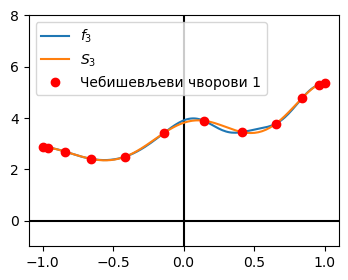

In [42]:
slika = plt.figure(figsize=(4,3)) 
plt.plot(x,f3,label=r'$f_3$')
plt.plot(x,S3,label=r'$S_3$')
plt.plot(chk,f3ck,'ro',label="Чебишевљеви чворови 1")
plt.ylim([-1,8])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.legend();

Максимално одступање вредности између две функције биће очигледно мање.

In [43]:
np.max(np.abs(f3-S3)) , x[np.argmax(np.abs(f3-S3))]

(0.17773862925718875, 0.28859060402684555)

За чворове интерполације сада бирамо друге Чебишевљеве чворове.

In [44]:
zhk=thk-np.pi/(2*n)
nchk=np.cos(zhk)
f3nck=F3(nchk)

Одредићемо коефицијенте одговарајућег интерполационог полинома у Њутновом облику.

In [45]:
koefU3=np.polyfit(nchk,f3nck,n-1)

За графички приказ полинома $U_3$ креирамо низ његових вредности на вектору $x.$

In [46]:
U3=np.polyval(koefU3,x)

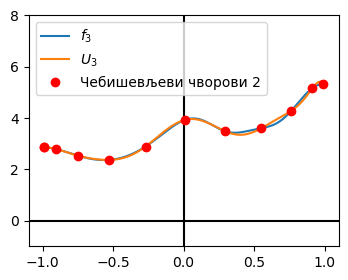

In [47]:
slika = plt.figure(figsize=(4,3)) 
plt.plot(x,f3,label=r'$f_3$')
plt.plot(x,U3,label=r'$U_3$')
plt.plot(nchk,f3nck,'ro',label="Чебишевљеви чворови 2")
plt.ylim([-1,8])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.legend();

Максимално одступање вредности између две функције биће очигледно мање.

In [48]:
np.max(np.abs(f3-U3)) , x[np.argmax(np.abs(f3-U3))]

(0.1523273640260805, 0.6644295302013423)

Креираћемо сада интерполациони полином $Q_3(x)$ на скупу еквидистантних чворова.

In [49]:
ek=np.linspace(-1,1,n)
f3ek=F3(ek)
koefQ3=np.polyfit(ek,f3ek,n-1)
Q3=np.polyval(koefQ3,x)

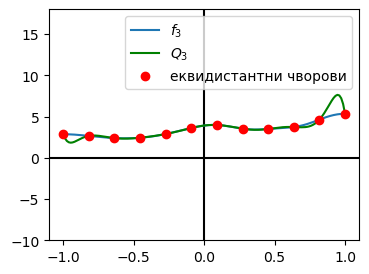

In [50]:
slika = plt.figure(figsize=(4,3)) 
plt.plot(x,f3,label=r'$f_3$')
plt.plot(x,Q3,'-g',label=r'$Q_3$')
plt.plot(ek,f3ek,'ro',label="еквидистантни чворови")
plt.ylim([-10,18])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.legend();

In [51]:
np.max(np.abs(f3-Q3)) , x[np.argmax(np.abs(f3-Q3))]

(2.361760567608437, 0.9463087248322146)

***

Још једна предност примене Чебишевљевих чворова огледа се у примеру **Рунгеовог феномена**. Интерполација функције $f (x)$ на сегменту $[−1, 1]$ на основу еквидистантних чворова даје добре резултате повећањем броја чворова, тј. повећањем степена интерполационог полинома у случају када су изводи функције $f (x)$ ограничени на сегменту интерполације. Грешка интерполације $E_n (x) =| f (x)− P_n (x)|$ тежи нули са повећањем степена. У општем случају грешка интерполационог полинома може да се понаша и другачије. Другим речима, постоје функције за које низ интерполационих полинома $\{P_n (x)\}$ не конвергира.

**Пример 11.**  Класичан пример функције за коју еквидистантни чворови не дају добре резултате у процесу интерполације је рационална функција $f (x) =\dfrac{ 1}{1+12x^2},$ код које максимум одступања $E_n (x)$ расте са повећањем степена $n\to\infty.$ Ова појава је означена као феномен Рунгеа. Наредним кодом можемо да пратимо овај феномен графички и кроз максимум одступања.

In [52]:
from ipywidgets import interact

In [53]:
x=np.linspace(-1,1,300)
f=1/(1+12*(x**2))

In [54]:
def Runge(n):
    xk=np.linspace(-1,1,n+1)
    fk=1/(1+12*(xk**2))
    P=np.polyfit(xk,fk,n)
    px=np.polyval(P,x)
    print(x[np.argmax(np.abs(f-px))] , np.max(np.abs(f-px)) )
    plt.figure(figsize=(4,4))
    plt.plot(x,f,label='f(x)')
    plt.plot(x,px,label='P(x)')
    plt.plot(xk,fk,'or')
    plt.ylim([-2,2])
    plt.legend();

In [55]:
interactive_plot = interact(Runge, n=(2,25,1))
interactive_plot;

interactive(children=(IntSlider(value=13, description='n', max=25, min=2), Output()), _dom_classes=('widget-in…

Са Чебишевљевим чворовима претходна појава је избегнута, што се уочава кроз наредни експеримент.

In [56]:
def RungeCebisev(n):
    zhk=np.linspace(np.pi,2*np.pi,n+1)-np.pi/(2*(n+1))
    xk=np.cos(zhk)
    fk=1/(1+12*(xk**2))
    P=np.polyfit(xk,fk,n)
    px=np.polyval(P,x)
    print(x[np.argmax(np.abs(f-px))] , np.max(np.abs(f-px)))
    plt.figure(figsize=(4,4))
    plt.plot(x,f,label='f(x)')
    plt.plot(x,px,label='P(x)')
    plt.plot(xk,fk,'or')
    plt.ylim([-2,2])
    plt.legend();

In [57]:
interactive_plot = interact(RungeCebisev, n=(2,25,1))
interactive_plot;

interactive(children=(IntSlider(value=13, description='n', max=25, min=2), Output()), _dom_classes=('widget-in…

Јасно је да се линеарним сликањем сегмента $[-1,1]$ на произвољни сегмент $[a,b]$ особине Чебишевљевих чворова преносе.

***